In [1]:
# ATTENTION: Please do not alter any of the provided code in the exercise. Only
# add your own code where indicated.
# ATTENTION: Please do not add or remove any cells in the exercise. The grader
# will check specific cells based on the cell position.
# ATTENTION: Please use the provided epoch values when training.

import csv
import numpy as np
import tensorflow as tf
from os import getcwd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
def get_data(filename):
    # You will need to write code that will read the file passed into this
    # function. The first line contains the column headers so you should ignore
    # it. Each successive line contains 785 comma separated values between 0
    # and 255. The first value is the label. The rest are the pixel values for
    # that picture. The function will return 2 np.array types, one with all the
    # labels and one with all the images.

    # TIPS:
    # If you read a full line (as "row") then row[0] has the label and
    # row[1:785] has the 784 pixel values. Take a look at np.array_split to
    # turn the 784 pixels into 28x28. You are reading in strings, but need the
    # values to be floats. Check out np.array().astype for a conversion.

    images = []
    labels = []
    with open(filename) as training_file:
        # YOUR CODE STARTS HERE
        reader = csv.reader(training_file)
        next(reader) # Skips the 1st line of the CSV file.
        for row in reader:
            images.append(np.array(row[1:]).reshape(28, 28).astype(float))
            labels.append(float(row[0]))
        images = np.array(images)
        labels = np.array(labels)
        # YOUR CODE ENDS HERE
    return images, labels


path_sign_mnist_train = f"{getcwd()}/../tmp2/sign_mnist_train.csv"
path_sign_mnist_test = f"{getcwd()}/../tmp2/sign_mnist_test.csv"
training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)

# Keep these:
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [3]:
# In this section you will have to add another dimension to the data.
# So, for example, if your array is (10000, 28, 28) you will need to make it
# (10000, 28, 28, 1).
# HINT: np.expand_dims

# YOUR CODE HERE
training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)

# Later, I'll play around with the values of the HYPERPARAMETERS. Then, for
# convenience, I'll set all of these values in the same place.

activations = {}
activations["conv1"] = "relu"
activations["conv2"] = "relu"
activations["dense1"] = "relu"

convolutions = {}
convolutions["conv1"] = 32
convolutions["conv2"] = 64

dimension = {}
dimension["convolution"] = 3
dimension["pooling"] = 2

BATCH_SIZE = 10
hidden_units = 512

# Hyperparameters related to the AUGMENTATION:
HEIGHT_SHIFT_RANGE = 0.2
ROTATION_RANGE = 20
SHEAR_RANGE = 0.1
WIDTH_SHIFT_RANGE = 0.2
ZOOM_RANGE = 0.2

# Create an ImageDataGenerator and do image augmentation:
train_datagen = ImageDataGenerator(
    # YOUR CODE HERE
    fill_mode="nearest",
    height_shift_range=HEIGHT_SHIFT_RANGE,
    horizontal_flip=True,
    rescale=1/255,
    rotation_range=ROTATION_RANGE,
    shear_range=SHEAR_RANGE,
    width_shift_range=WIDTH_SHIFT_RANGE,
    zoom_range=ZOOM_RANGE
)

train_generator = train_datagen.flow(
    training_images,
    training_labels,
    batch_size=BATCH_SIZE
)

validation_datagen = ImageDataGenerator(
    # YOUR CODE HERE
    rescale=1/255
)

validation_generator = validation_datagen.flow(
    testing_images,
    testing_labels,
    batch_size=BATCH_SIZE
)

# Keep these:
print(training_images.shape)
print(testing_images.shape)

# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [4]:
# Define the model. Use no more than 2 Conv2D and 2 MaxPooling2D.
model = tf.keras.models.Sequential([
    # YOUR CODE HERE

    # 1st convolutional layer:
    tf.keras.layers.Conv2D(
        convolutions["conv1"],
        (dimension["convolution"], dimension["convolution"]),
        activation=activations["conv1"],
        input_shape=(28, 28, 1)
    ),
    tf.keras.layers.MaxPooling2D(dimension["pooling"], dimension["pooling"]),

    # 2nd convolutional layer:
    tf.keras.layers.Conv2D(
        convolutions["conv2"],
        (dimension["convolution"], dimension["convolution"]),
        activation=activations["conv2"]
    ),
    tf.keras.layers.MaxPooling2D(dimension["pooling"], dimension["pooling"]),

    # Flattens the results:
    tf.keras.layers.Flatten(),

    # Hidden layer:
    tf.keras.layers.Dense(hidden_units, activation=activations["dense1"]),

    # In this problem, there are 25 classes. Then we need 25 output neurons:
    tf.keras.layers.Dense(25, activation="sigmoid")
])

# Compile the model.
model.compile(
    # YOUR CODE HERE
    loss="sparse_categorical_crossentropy",
    metrics=["acc"],
    optimizer="adam"
)

# Train the model.
# Set epochs = 2.
history = model.fit_generator(
    # YOUR CODE HERE
    train_generator,
    epochs=2,
    validation_data=validation_generator,
    verbose=2
)

model.evaluate(
    testing_images,
    testing_labels,
    verbose=0
)

Epoch 1/2
2746/2746 - 138s - loss: 2.2604 - acc: 0.2887 - val_loss: 0.9971 - val_acc: 0.6655
Epoch 2/2
2746/2746 - 129s - loss: 1.1593 - acc: 0.6156 - val_loss: 0.6586 - val_acc: 0.7698


[3.0476084545346125, 0.081985496]

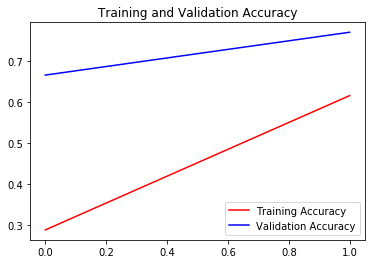

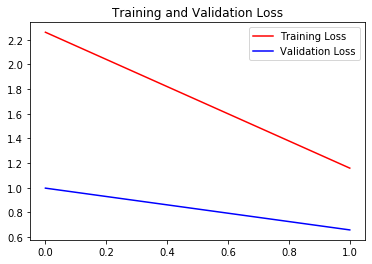

In [5]:
# Plot the chart for accuracy and loss on both training and validation.
%matplotlib inline
import matplotlib.pyplot as plt

# YOUR CODE HERE

acc = history.history["acc"]
val_acc = history.history["val_acc"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(acc))

plt.plot(epochs, acc, "r", label="Training Accuracy")
plt.plot(epochs, val_acc, "b", label="Validation Accuracy")
plt.legend()
plt.title("Training and Validation Accuracy")

plt.figure()

plt.plot(epochs, loss, "r", label="Training Loss")
plt.plot(epochs, val_loss, "b", label="Validation Loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.show()

# Submission Instructions

In [6]:
# Now click the "Submit Assignment" button above.

# When you're done or would like to take a break, please run the two cells below
to save your work and close the notebook. This will free up resources for your
fellow learners.

In [ ]:
%%javascript
<!-- Save the notebook -->
IPython.notebook.save_checkpoint();

In [ ]:
%%javascript
IPython.notebook.session.delete();
window.onbeforeunload = null
setTimeout(function() { window.close(); }, 1000);